In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

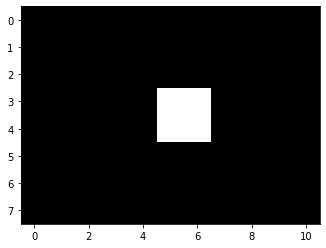

In [3]:
img_matrix = np.array([[1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              ]).astype('uint8')
structuring_kernel = np.array([[1,1,1],
                               [1,1,1],
                               [1,1,1]]).astype('uint8')
inverted_img = np.invert(img_matrix)
plt.imshow(inverted_img, cmap = 'gray')

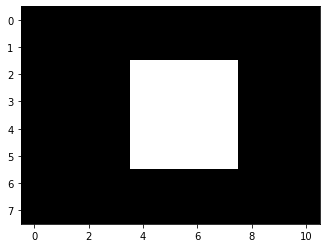

In [4]:
final_img = cv2.dilate(inverted_img, structuring_kernel)
plt.imshow(final_img, cmap = 'gray')

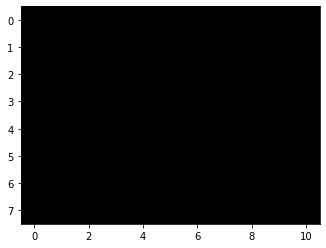

In [5]:
final_img = cv2.erode(inverted_img, structuring_kernel)
plt.imshow(final_img, cmap = 'gray')

## And if we invert the image, we could get away with only one operation

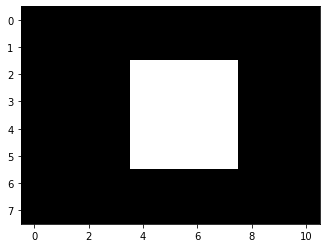

In [6]:
final_img = np.invert(cv2.erode(img_matrix, structuring_kernel))
plt.imshow(final_img, cmap = 'gray')

## Image Skeletonization:
(Assumption: Image is already binarized)
### Algorithm:
1. Compute Opening of Original Image
2. Subract opened image from original image (img_temp)
3. Erode the original Image, Compute it's union with temp
4. Repeat 2-4 until the image is completely eroded

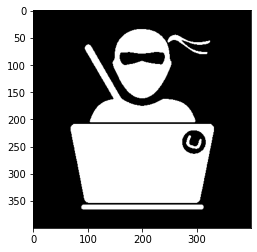

In [28]:
img = cv2.imread("images/ninja.png", 0)
img_binarized = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
plt.imshow(img_binarized, cmap = 'gray')

In [29]:
#Creating Empty Skeleton:
blank_canvas = np.zeros(img_binarized.shape, dtype = 'uint8')
#Creating a Kernel:
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))


In [30]:
while True:
    open = cv2.morphologyEx(img_binarized, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(img_binarized, open)
    eroded = cv2.erode(img_binarized, element)
    blank_canvas = cv2.bitwise_or(blank_canvas, temp)
    img_binarized = eroded.copy()
    if cv2.countNonZero(img_binarized)==0:
        break

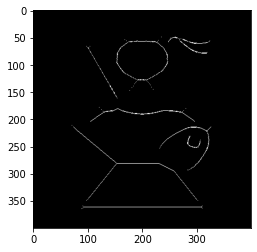

In [31]:
plt.imshow(blank_canvas, cmap = 'gray')

# Limitations of this code:
1. Your image should be a black canvas with white pixels as image of interest, not the opposite.